<a href="https://colab.research.google.com/github/applejxd/colaboratory/blob/master/ml/diamonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 回帰分析のデモ

[「Regression Tutorial - Level Beginner」](https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Beginner%20-%20REG101.ipynb)と
[「Regression - Level Intermediate」](https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Intermediate%20-%20REG102.ipynb)より。

## インストール

[pip から PyCaret インストール。](https://pycaret.gitbook.io/docs/get-started/installation)

[jinja2 関連のエラーは pandas-profiling==3.1.0 で回避。](https://teratail.com/questions/5b01vplewor7kl)

In [1]:
%%capture
# install pycaret and hide the log by %%capture
!pip install --upgrade pycaret pandas-profiling==3.1.0

from pycaret.utils import enable_colab
enable_colab()

## 前準備

Diamonds タスクのデータセットを取得。
データ形式は DataFrame。

In [2]:
from pycaret.datasets import get_data
import pandas as pd

dataset: pd.DataFrame = get_data('diamond')
print(f"Table size = {dataset.shape}")

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


Table size = (6000, 8)


回帰タスクのために学習データとバリデーションデータに分割

In [3]:
# 90% ランダム抽出, 再現性のためにシード random_state を固定
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

# 行番号振り直し
data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print(f'Data for Modeling: {data.shape}')
print(f'Unseen Data For Predictions: {data_unseen.shape}')

Data for Modeling: (5400, 8)
Unseen Data For Predictions: (600, 8)


## 前処理

PyCaret では regression.setup() だけで前処理完了。
詳細は [API リファレンス](https://pycaret.readthedocs.io/en/latest/api/regression.html)を参照。

実行後に表示される DataType に問題がなければ Enter キーを押下。
押下後に前処理の詳細が表示される。

In [4]:
from pycaret import regression

exp_reg102 = regression.setup(
    # 学習タスクの設定 & シードの固定 & データの確認(Enter キー押下)省略
    data = data, target = 'Price', session_id=123, silent=True,
    # 数値変数の標準化 & Yeo-Johnson 変換 (非線形変換) による Gauss-like 分布化
    normalize = True, transformation = True, transform_target = True, 
    # 頻度の低いカテゴリ変数を統合
    combine_rare_levels = True, rare_level_threshold = 0.05,
    # 相関関係から数値変数の重複を削除
    remove_multicollinearity = True, multicollinearity_threshold = 0.95, 
    # 数値変数をカテゴリ変数に変換
    bin_numeric_features = ['Carat Weight'],
    log_experiment = True, experiment_name = 'diamond1') 

,Description,Value
0,session_id,123
1,Target,Price
2,Original Data,"(5400, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3779, 39)"


2022/07/02 16:02:11 INFO mlflow.tracking.fluent: Experiment with name 'diamond1' does not exist. Creating a new experiment.


In [5]:
help(regression.get_config)

Help on function get_config in module pycaret.regression:

get_config(variable: str)
    This function retrieves the global variables created when initializing the
    ``setup`` function. Following variables are accessible:
    
    - X: Transformed dataset (X)
    - y: Transformed dataset (y)
    - X_train: Transformed train dataset (X)
    - X_test: Transformed test/holdout dataset (X)
    - y_train: Transformed train dataset (y)
    - y_test: Transformed test/holdout dataset (y)
    - seed: random state set through session_id
    - prep_pipe: Transformation pipeline
    - fold_shuffle_param: shuffle parameter used in Kfolds
    - n_jobs_param: n_jobs parameter used in model training
    - html_param: html_param configured through setup
    - create_model_container: results grid storage container
    - master_model_container: model storage container
    - display_container: results display container
    - exp_name_log: Name of experiment
    - logging_param: log_experiment param
    

## PyCaret 使用

### 学習

### モデル選択

使用できるモデルの一覧を表示。 full インストールだと catboost, xgboost なども追加される。

In [6]:
regression.models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


クロスバリデーションで性能比較。

RANSAC は検証対象外に設定。戻り値は上位3モデルのリスト。

[チュートリアル](https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Intermediate%20-%20REG102.ipynb)
には前処理によってスコアが上昇したことが指摘されている。

In [7]:
from typing import List
from pycaret.internal.meta_estimators import PowerTransformedTargetRegressor

top3 = regression.compare_models(exclude = ['ransac'], n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,766.0853,3.116467e+06,1704.0975,0.9704,0.0799,0.0576,0.220
rf,Random Forest Regressor,850.1194,3.267554e+06,1770.6698,0.9686,0.0904,0.0657,1.586
huber,Huber Regressor,940.6199,3.651906e+06,1891.7125,0.9640,0.0972,0.0708,0.329
ridge,Ridge Regression,952.2538,3.846278e+06,1934.6314,0.9624,0.0971,0.0715,0.040
br,Bayesian Ridge,956.6502,3.999160e+06,1967.8153,0.9608,0.0972,0.0716,0.077
lr,Linear Regression,960.2937,4.046533e+06,1978.6945,0.9604,0.0973,0.0717,0.405
et,Extra Trees Regressor,964.4979,4.410739e+06,2062.2772,0.9569,0.1055,0.0759,1.778
dt,Decision Tree Regressor,1000.2500,4.685153e+06,2136.9863,0.9539,0.1082,0.0778,0.081
gbr,Gradient Boosting Regressor,1107.4885,5.269003e+06,2255.3276,0.9486,0.1100,0.0832,0.549
par,Passive Aggressive Regressor,1341.4005,7.149373e+06,2588.2842,0.9288,0.1282,0.0964,0.053


### モデルチューニング

モデル作成

In [8]:
lightgbm = regression.create_model('lightgbm', fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,854.7383,5.085739e+06,2255.1583,0.9541,0.0819,0.0590
1,737.8828,1.941999e+06,1393.5563,0.9806,0.0770,0.0580
2,759.7694,4.185480e+06,2045.8447,0.9576,0.0805,0.0565
3,833.0629,3.656777e+06,1912.2701,0.9606,0.0831,0.0597
4,792.5717,3.008038e+06,1734.3695,0.9709,0.0862,0.0589
Mean,795.6050,3.575607e+06,1868.2398,0.9648,0.0817,0.0584
Std,43.6465,1.063000e+06,292.0389,0.0097,0.0030,0.0011


探索空間を定義

In [9]:
import numpy as np
lgbm_params = {
    'num_leaves': np.arange(10,200,10),
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
    'learning_rate': np.arange(0.1,1,0.1)
    }

パラメータチューニング

In [10]:
tuned_lightgbm = regression.tune_model(lightgbm, custom_grid = lgbm_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,822.6400,2.569288e+06,1602.8998,0.9718,0.0868,0.0641
1,1008.9226,6.724758e+06,2593.2138,0.9485,0.0860,0.0618
2,815.8761,2.461915e+06,1569.0490,0.9774,0.0857,0.0628
3,805.5570,2.066453e+06,1437.5162,0.9772,0.0805,0.0620
4,814.8100,2.151031e+06,1466.6394,0.9732,0.0904,0.0664
5,881.7793,4.766152e+06,2183.1518,0.9593,0.0838,0.0608
6,951.9875,4.092100e+06,2022.8940,0.9616,0.0906,0.0662
7,872.9769,3.230169e+06,1797.2671,0.9592,0.0889,0.0654
8,790.5395,2.393345e+06,1547.0439,0.9765,0.0801,0.0609


チューニング結果を表示

In [11]:
regression.plot_model(tuned_lightgbm, plot = 'parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.7000000000000001
max_depth,80
min_child_samples,20
min_child_weight,0.001
min_split_gain,0.0
n_estimators,100


### 可視化

特徴量の重要度

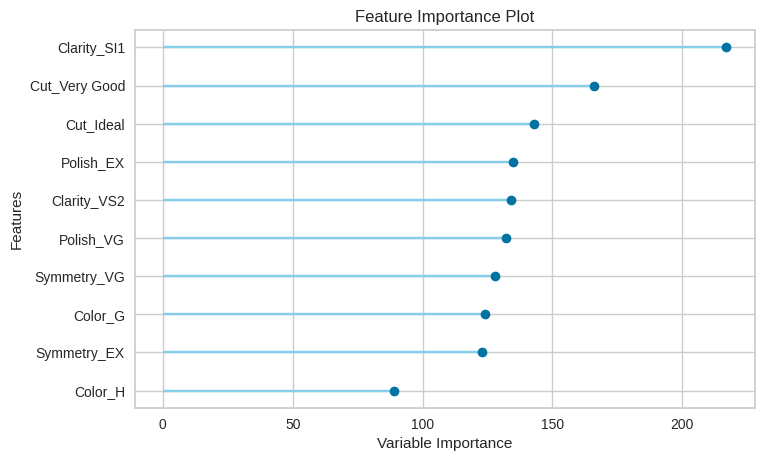

In [12]:
regression.plot_model(tuned_lightgbm, plot='feature')

タブで可視化内容を切り替えられる API も存在

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

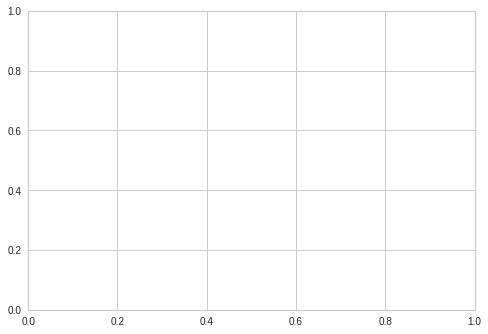

In [13]:
regression.evaluate_model(tuned_lightgbm)

### モデル決定

In [14]:
regression.predict_model(tuned_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,859.7053,4.258740e+06,2063.6715,0.9612,0.0855,0.0617


決定したハイパーパラメータを用い、学習データ全体で学習。

（クロスバリデーションでは一部データで学習していた）

In [15]:
final_lightgbm = regression.finalize_model(tuned_lightgbm)
print(final_lightgbm)

PowerTransformedTargetRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.7000000000000001, max_depth=80,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=30, objective=None,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True...
                                                        learning_rate=0.7000000000000001,
                                                        max_depth=80,
                                                        min_child_samples=20,
                                                        min_child_weight=0.001,
                                                        min_split_gain=0.0,
              

最終的な機械学習モデルの性能をチェック

In [16]:
regression.predict_model(final_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,586.0376,1417608.605,1190.6337,0.9871,0.0577,0.0436


### 予測

データ予測を実施

In [17]:
unseen_predictions = regression.predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,827.2334,2.248977e+06,1499.6589,0.9781,0.0797,0.0607


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,13130.893671
1,1.50,Fair,F,SI1,VG,VG,GIA,10450,10567.033220
2,1.01,Good,E,SI1,G,G,GIA,5161,4961.249017
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361,32539.520528
4,1.01,Good,I,SI1,VG,VG,GIA,4238,4140.860588


決定係数を計算

In [18]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.Price, unseen_predictions.Label, 'R2')

0.9781

モデルを保存

In [19]:
regression.save_model(final_lightgbm,'Final LightGBM Model 25Nov2020')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy=...
                                                                          learning_rate=0.7000000000000001,
                                                                          max_depth=80,
                                                                          min_child_samples=20,
                     

### モデルの再読み込み

In [20]:
saved_final_lightgbm = regression.load_model('Final LightGBM Model 25Nov2020')
new_prediction = regression.predict_model(saved_final_lightgbm, data=data_unseen)
new_prediction.head()

Transformation Pipeline and Model Successfully Loaded


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,827.2334,2.248977e+06,1499.6589,0.9781,0.0797,0.0607


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,13130.893671
1,1.50,Fair,F,SI1,VG,VG,GIA,10450,10567.033220
2,1.01,Good,E,SI1,G,G,GIA,5161,4961.249017
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361,32539.520528
4,1.01,Good,I,SI1,VG,VG,GIA,4238,4140.860588


## Tensorflow を使用

In [21]:
import tensorflow as tf

x_train = regression.get_config("X_train")
y_train = regression.get_config("y_train")
x_test = regression.get_config("X_test")
y_test = regression.get_config("y_test")

print(x_train.head())

      Cut_Fair  Cut_Good  Cut_Ideal  Cut_Signature-Ideal  Cut_Very Good  \
142        0.0       0.0        1.0                  0.0            0.0   
3675       0.0       0.0        1.0                  0.0            0.0   
4732       0.0       0.0        0.0                  0.0            1.0   
2005       0.0       1.0        0.0                  0.0            0.0   
1949       0.0       0.0        0.0                  0.0            1.0   

      Color_D  Color_E  Color_F  Color_G  Color_H  ...  Carat Weight_11.0  \
142       0.0      0.0      0.0      1.0      0.0  ...                0.0   
3675      0.0      1.0      0.0      0.0      0.0  ...                0.0   
4732      0.0      0.0      0.0      1.0      0.0  ...                0.0   
2005      1.0      0.0      0.0      0.0      0.0  ...                0.0   
1949      0.0      0.0      0.0      1.0      0.0  ...                0.0   

      Carat Weight_12.0  Carat Weight_2.0  Carat Weight_3.0  Carat Weight_4.0  \
142  

In [22]:
nn_model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, activation='relu', input_shape=[39]),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1)
])
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2560      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,785
Trainable params: 6,785
Non-trainable params: 0
_________________________________________________________________


In [23]:
nn_model.compile(loss="mse", optimizer='adam', metrics=["mae", "mse"])

In [24]:
history = nn_model.fit(x_train.values, y_train.values, epochs=200, verbose=0)
pd.DataFrame(history.history)

,loss,mae,mse
0,2.354765e+08,11588.619141,2.354765e+08
1,2.249553e+08,11116.594727,2.249553e+08
2,1.878238e+08,9275.985352,1.878238e+08
3,1.359818e+08,6932.523438,1.359818e+08
4,1.030791e+08,6447.916504,1.030791e+08
...,...,...,...
195,1.475092e+06,635.444519,1.475092e+06
196,1.469534e+06,633.764465,1.469534e+06
197,1.476117e+06,634.617188,1.476117e+06
198,1.458000e+06,631.449036,1.458000e+06


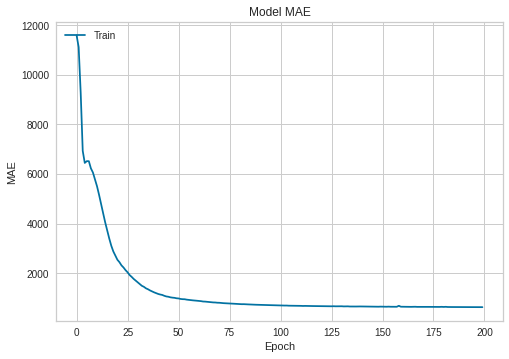

In [25]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [26]:
nn_model.evaluate(x_test.values,  y_test.values, verbose=2)

51/51 - 0s - loss: 1783985.6250 - mae: 697.6697 - mse: 1783985.6250 - 210ms/epoch - 4ms/step


[1783985.625, 697.6697387695312, 1783985.625]

In [27]:
from sklearn.metrics import r2_score

r2_score(nn_model.predict(x_test.values), y_test.values)

0.9831200819285258